# <img style="float: left; padding-right: 10px; width: 45px" src="styles/iacs.png"> S-109A Introduction to Data Science 

## Homework 1

**Harvard University**<br/>
**Summer 2018**<br/>
**Instructors**: Pavlos Protopapas and Kevin Rader

---


## Main Theme: Data Collection - Web Scraping - Data Parsing 
#### Learning Objectives 

In this homework, your goal is to learn how to acquire, parse, clean, and analyze data. Initially you read the data from a file, then you scrape them directly from a website. You look for specific pieces of information by parsing the data, you clean the data to prepare them for analysis, and finally, you answer some questions.

#### Instructions
- To submit your assignment follow the instructions given in Canvas.
- The deliverables in Canvas are: a) This python notebook with your code and answers, b) a .pdf version of this notebook, c) The BibTex file you created.
d) The JSON file you created.
- Exercise **responsible scraping**. Web servers can become slow or unresponsive if they receive too many requests from the same source in a short amount of time. Use a delay of 10 seconds between requests in your code. This helps not to get blocked by the target website. Run the webpage fetching part of the homework only once and do not re-run after you have saved the results in the JSON file (details below). 
- Web scraping requests can take several minutes. This is another reason why you should not wait until the last minute to do this homework.

In [1]:
# import the necessary libraries
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)


## Part A [50 pts]:  Help a professor convert his publications to bibTex

### Overview

In Part 1 your goal is to parse the HTML page of a Professor containing some of his publications, and answer some questions. This page is provided to you in the file `data/publist_super_clean.html`. There are 44 publications in descending order from No. 244 to No. 200.

You are to use python's **regular expressions**, a powerful way of parsing text. You may **not** use any parsing tool such as Beautiful Soup yet. In doing so you will get more familiar with three of the common file formats for storing and transferring data, which are:
- CSV, a text-based file format used for storing tabular data that are separated by some delimiter, usually comma or space.
- HTML/XML, the stuff the web is made of.
- JavaScript Object Notation(JSON), a text-based open standard designed for transmitting structured data over the web.

### <p class='q1'> Question 1: Parsing using Regular Expressions 
 **1.1** Write a function called `get_pubs` that takes a .html filename as an input and returns a string containing the HTML page in this file (see definition below). Call this function using `data/publist_super_clean.html` as input and name the returned string `prof_pubs`. 
 
 **1.2** Calculate how many times the author named '`C.M. Friend`' appears in the list of publications. 
 
 **1.3** Find all unique journals and copy them in a variable named `journals`.  
 
 **1.4** Create a list named `pub_authors` whose elements are strings containing the authors' names for each paper. 
    
### Hints
- Look for patterns in the HTML tags that reveal where each piece of information such as the title of the paper, the names of the authors, the journal name, is stored. For example, you might notice that the journal name(s) is contained between the &lt;I&gt; HTML tag.
- Each publication has multiple authors. 
- `C.M. Friend` also shows up as `Cynthia M. Friend` in the file.  Count just `C. M. Friend`. 
- There is a comma at the end of the string of authors. You can choose to keep it in the string or remove it and put it back when you write the string as a BibTex entry. 
- You want to remove duplicates from the list of journals. 

### Resources
- **Regular expressions:** a) https://docs.python.org/3.3/library/re.html, b) https://regexone.com, and c) https://docs.python.org/3/howto/regex.html. 
- ** HTML:** if you are not familiar with HTML see https://www.w3schools.com/html/ or one of the many tutorials on the internet. 
- ** Document Object Model (DOM):** for more on this programming interface for HTML and XML documents see https://www.w3schools.com/js/js_htmldom.asp. 

#### 1.1

In [2]:
# import the regular expressions library
import re

In [3]:
# use this file 
pub_filename = 'data/publist_super_clean.html'

In [4]:
# your code here
def get_pubs(pub_filename):
    with open(pub_filename) as f:
        file = f.read()
    return file

prof_pubs = get_pubs(pub_filename)

In [5]:
# definition of get_pubs
def get_pubs(filename: str) -> str:
    
    '''Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    '''

In [6]:
# check your code 
print (prof_pubs)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<TITLE>Kaxiras E journal publications</TITLE>
<HEAD>
<meta http-equiv="Content-Type" content="text/html;charset=UTF-8">
<LINK REL="stylesheet" TYPE="text/css" HREF="../styles/style_pubs.css">
<META NAME="description" CONTENT="">
<META NAME="keywords" CONTENT="Kaxiras E, Multiscale Methods, Computational Materials" >
</HEAD>

<BODY>

<OL START=244>
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAd

In [7]:
print(get_pubs.__doc__)

Open the file using the filename. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A string containing the HTML page ready to be parsed.
    


You should see an HTML page
```html
<LI>
<A HREF="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
&quot;Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons&quot;</A>
<BR>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  125411 (2011)
<BR>
</LI>
</OL>

<OL START=243>
<LI>
<A HREF="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
&quot;Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles&quot;</A>
<BR>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<I>PHYSICAL REVIEW B </I> <b>84</b>,  035325 (2011)
<BR>
</LI>
</OL>

<OL START=242>
<LI>
<A HREF="Papers/2011/PhysRevB_83_054204_2011.pdf" target="paper242">
&quot;Influence of CH2 content and network defects on the elastic properties of organosilicate glasses&quot;</A>
<BR>Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
<I>PHYSICAL REVIEW B </I> <b>83</b>,  054204 (2011)
<BR>
</LI>
</OL>
    ```

#### 1.2

In [8]:
# your code here
regex = 'C.M. Friend'
len(re.findall(regex, prof_pubs))

5

#### 1.3

In [9]:
# your code here
regex = r'<I>.*</I>'
journals_aux = re.findall(regex, prof_pubs)
journals = set([x[3:-4].strip() for x in journals_aux])

In [10]:
# check your code: print journals
journals

{'2010 ACM/IEEE International Conference for High Performance',
 'ACSNano.',
 'Ab initio',
 'Acta Mater.',
 'Catal. Sci. Technol.',
 'Chem. Eur. J.',
 'Comp. Phys. Comm.',
 'Concurrency Computat.: Pract. Exper.',
 'Energy & Environmental Sci.',
 'Int. J. Cardiovasc. Imaging',
 'J. Chem. Phys.',
 'J. Chem. Theory Comput.',
 'J. Phys. Chem. B',
 'J. Phys. Chem. C',
 'J. Phys. Chem. Lett.',
 'J. Stat. Mech: Th. and Exper.',
 'Langmuir',
 'Molec. Phys.',
 'Nano Lett.',
 'NanoLett.',
 'New J. Phys.',
 'New Journal of Physics',
 'PHYSICAL REVIEW B',
 'Phil. Trans. R. Soc. A',
 'Phys. Rev. B',
 'Phys. Rev. E - Rap. Comm.',
 'Phys. Rev. Lett.',
 'Sci. Model. Simul.',
 'Sol. St. Comm.',
 'Top. Catal.'}

Your output should look like this (remember, no duplicates):
```
'ACSNano.',
 'Ab initio',
 'Ab-initio',
 'Acta Mater.',
 'Acta Materialia',
 'Appl. Phys. Lett.',
 'Applied Surface Science',
 'Biophysical J.',
 'Biosensing Using Nanomaterials',

 ...

 'Solid State Physics',
 'Superlattices and Microstructures',
 'Surf. Sci.',
 'Surf. Sci. Lett.',
 'Surface  Science',
 'Surface Review and Letters',
 'Surface Sci. Lett.',
 'Surface Science Lett.',
 'Thin Solid Films',
 'Top. Catal.',
 'Z'}
```

#### 1.4

In [11]:
# our code here
regex = r'<BR>.+'
pub_authors = [x[4:].strip() for x in re.findall(regex, prof_pubs)]

In [12]:
# check your code: print the list of strings containing the author(s)' names
for item in pub_authors:
    print (item)

Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
Jan M. Knaup, Han Li, Joost J. Vlassak, and Efthimios Kaxiras,
Martin Heiss, Sonia Conesa-Boj, Jun Ren, Hsiang-Han Tseng, Adam Gali,
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,
Kejie Zhao, Wei L. Wang, John Gregoire, Matt Pharr, Zhigang Suo,
Masataka Katono, Takeru Bessho, Sheng Meng, Robin Humphry-Baker, Guido Rothenberger,
Thomas D. Kuhne, Tod A. Pascal, Efthimios Kaxiras, and Yousung Jung,
Sheng Meng, Efthimios Kaxiras, Md. K. Nazeeruddin, and Michael Gratzel,
Bingjun Xu, Jan Haubrich, Thomas A. Baker, Efthimios Kaxiras, and Cynthia M. Friend,
Jun Ren, Sheng Meng, Yi-Lin Wang, Xu-Cun Ma, Qi-Kun Xue, Efthimios Kaxiras,
Jan Haubrich, Efthimios Kaxiras, and Cynthia M. Friend,
Thomas A. Baker, Bingjun Xu, Stephen C. Jensen, Cynthia M. Friend and Efthimio

Your output should look like this (a line for each paper's author(s) string, with or without the comma)<BR><br>
S. Meng and E. Kaxiras,<br>
G. Lu and E. Kaxiras,<br>
E. Kaxiras and S. Yip,<br>
...<BR>
Simone Melchionna, Efthimios Kaxiras, Massimo Bernaschi and Sauro Succi,<BR>
J R Maze, A Gali, E Togan, Y Chu, A Trifonov,<BR>
E Kaxiras, and M D Lukin,<BR>

<hr style="height:1px">

### Question 2: Parsing and Converting to bibTex using Beautiful Soup

A lot of the bibliographic and publication information is displayed in various websites in a not-so-structured HTML files. Some publishers prefer to store and transmit this information in a .bibTex file which has the following format:
```
@article { _number_
     author = John Doyle
     title = Interaction between atoms
     URL = Papers/PhysRevB_81_085406_2010.pdf
     journal = Phys. Rev. B
     volume = 81
}
```

```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}
```
About the [bibTex format](http://www.bibtex.org).

In Question 2 you are given an .html file containing a list of papers scraped from the author's website and you are to write the information into .bibTex format. We used regular expressions for parsing HTML in the previous question but just regular expressions are hard to use in parsing real-life websites. A useful tool is [BeautifulSoup]  (http://www.crummy.com/software/BeautifulSoup/) (BS). You will parse the same file, this time using BS, which makes parsing HTML a lot easier.

**2.1** Write a function called `make_soup` that accepts a filename for an HTML file and returns a BS object.
    
**2.2** Write a function that reads in the BS object, parses it, converts it into the .bibTex format using python string manipulation and regular expressions, and writes the data into `publist.bib`. You will need to create that file in your folder.  

    
#### HINT
- Inspect the HTML code for tags that indicate information chunks such as `title` of the paper. You had already done this in Part 1 when you figured out how to get the name of the journal from the HTML code. The `find_all` method of BeautifulSoup might be useful.
- Question 2.2 is better handled if you break the code into functions, each performing a small task such as finding the author(s) for each paper.
- Make sure you catch exceptions when needed.
- Regular expressions are a great tool for string manipulation. 


#### Resources
- [BeautifulSoup Tutorial](https://www.dataquest.io/blog/web-scraping-tutorial-python/).
- More about the [BibTex format](http://www.bibtex.org).<BR>

In [13]:
# import the necessary libraries 
from bs4 import BeautifulSoup
from sys import argv
from urllib.request import urlopen
from urllib.error import HTTPError

#### 2.1

In [14]:
# your code here
def make_soup(filename):
    '''Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page.
    '''
    with open(filename) as f:
        file = f.read()
    soup = BeautifulSoup(file)
    return soup

In [15]:
print(make_soup.__doc__)
soup =  make_soup(pub_filename)

Open the file and convert into a BS object. 
       
       Args:
           filename: A string name of the file.
       
       Returns:
           A BS object containing the HTML page.
    


In [16]:
# check your code: print the Beautiful Soup object, you should see an HTML page
print (soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN" "http://www.w3.org/TR/html4/loose.dtd">
<html><head><title>Kaxiras E journal publications</title>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head><body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efth

Your output should look like this:
```
<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN"
   "http://www.w3.org/TR/html4/loose.dtd">

<title>Kaxiras E journal publications</title>
<head>
<meta content="text/html;charset=utf-8" http-equiv="Content-Type"/>
<link href="../styles/style_pubs.css" rel="stylesheet" type="text/css"/>
<meta content="" name="description"/>
<meta content="Kaxiras E, Multiscale Methods, Computational Materials" name="keywords"/>
</head>
<body>
<ol start="244">
<li>
<a href="Papers/2011/PhysRevB_84_125411_2011.pdf" target="paper244">
"Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"</a>
<br/>Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  125411 (2011)
<br/>
</li>
</ol>
<ol start="243">
<li>
<a href="Papers/2011/PhysRevB_84_035325_2011.pdf" target="paper243">
"Effect of symmetry breaking on the optical absorption of semiconductor nanoparticles"</a>
<br/>JAdam Gali, Efthimios Kaxiras, Gergely T. Zimanyi, Sheng Meng,
<i>PHYSICAL REVIEW B </i> <b>84</b>,  035325 (2011)
<br/>
</li>
</ol>

...

```

#### 2.2

In [17]:
# your code here 
bib_pubs = []
for pub in soup.find_all('ol'):
    pub_dict = {}
    pub_dict['URL'] = pub.a['href']
    pub_dict['ENTRYTYPE'] = 'article'
    pub_dict['ID'] = pub['start']
    for aux,pub_text in enumerate(pub.stripped_strings):
        if aux==0: pub_dict['title'] = pub_text
        if aux==1: pub_dict['author'] = pub_text
        if aux==2: pub_dict['journal'] = pub_text
        if aux==3: pub_dict['volume'] = pub_text   
    bib_pubs.append(pub_dict)

In [18]:
#!pip install bibtexparser
from bibtexparser.bwriter import BibTexWriter
from bibtexparser.bibdatabase import BibDatabase

In [19]:
db = BibDatabase()
db.entries = bib_pubs
writer = BibTexWriter()
bibfile = open('publist.bib', 'w')
bibfile.write(writer.write(db))

13212

In [20]:
# check your code: print the BibTex file
f = open('publist.bib','r')
print (f.read())

@article{200,
 URL = {Papers/PhysRevB_78_205112_2008.pdf},
 author = {E. Manousakis, J. Ren, S. Meng and E. Kaxiras,},
 journal = {Phys. Rev. B},
 title = {"Effective Hamiltonian for FeAs-based superconductors"},
 volume = {78}
}

@article{201,
 URL = {Papers/SciModSim_15_59_2008.pdf},
 author = {E. Kaxiras and S. Succi,},
 journal = {Sci. Model. Simul.},
 title = {"Multiscale simulations of complex systems: computation meets reality"},
 volume = {15}
}

@article{202,
 URL = {Papers/JPhysChemC_113_3232_2009.pdf},
 author = {T.A. Baker, C.M. Friend and E. Kaxiras,},
 journal = {J. Phys. Chem. C},
 title = {"Atomic Oxygen Adsorption on Au(111) Surfaces with Defects"},
 volume = {113}
}

@article{203,
 URL = {Papers/JChemPhys_130_084701_2009.pdf},
 author = {T.A. Baker, C.M. Friend and E. Kaxiras,},
 journal = {J. Chem. Phys.},
 title = {"Effects of chlorine and oxygen coverage on the structure of the Au(111) surface"},
 volume = {130}
}

@article{204,
 URL = {Papers/PhysRevLett_102_09550

Your output should look like this
```
@article
{    author = Ming-Wei Lin, Cheng Ling, Luis A. Agapito, Nicholas Kioussis, Yiyang Zhang, Mark Ming-Cheng Cheng
     title = "Approaching the intrinsic band gap in suspended high-mobility graphene nanoribbons"
     URL = Papers/2011/PhysRevB_84_125411_2011.pdf
     journal = PHYSICAL REVIEW B
     volume = 84
}

...

@article
{    author = E. Kaxiras and S. Succi
     title = "Multiscale simulations of complex systems: computation meets reality"
     URL = Papers/SciModSim_15_59_2008.pdf
     journal = Sci. Model. Simul.
     volume = 15
}
@article
{    author = E. Manousakis, J. Ren, S. Meng and E. Kaxiras
     title = "Effective Hamiltonian for FeAs-based superconductors"
     URL = Papers/PhysRevB_78_205112_2008.pdf
     journal = Phys. Rev. B
     volume = 78
}
```

---

## Part B [50 pts]:  Follow the stars in IMDb's list of "The Top 100 Stars for 2017" 

### Overview

In Part 3 your goal is to extract information from IMDb's Top 100 Stars for 2017 (https://www.imdb.com/list/ls025814950/) and perform some analysis on each star in the list. In particular we are interested to know: a) how many performers made their first movie at 17? b) how many performers started as child actors? c) who is the most proliferate actress or actor in IMDb's list of the Top 100 Stars for 2017? . These questions are addressed in more details in the Questions below. 

When data is **not** given to us in a file, we need to fetch them using one of the following ways:
- download a file from a source URL
- query a database 
- query a web API 
- scrape data from the web page

### Question 1: Web Scraping Using Beautiful Soup
**1.1** Download the webpage of the "Top 100 Stars for 2017" (https://www.imdb.com/list/ls025814950/) into a `requests` object and name it `my_page`. Explain what the following attributes are:

- `my_page.text`, 
- `my_page.status_code`,
- `my_page.content`.

**1.2** Create a Beautiful Soup object named `star_soup` giving `my_page` as input.

**1.3** Write a function called `parse_stars` that accepts `star_soup` as its input and generates a list of dictionaries named `starlist` (see definition below). One of the fields of this dictionary is the `url` of each star's individual page, which you need to scrape and save the contents in the `page` field. Note that there is a ton of information about each star on these webpages. 

**1.4** Write a function called `create_star_table` to extract information about each star (see function definition for the exact information to extract). **Only extract information from the first box on each star's page. If the first box is acting, consider only acting credits and the star's acting debut, if the first box is Directing, consider only directing credits and directorial debut.**

**1.5** Now that you have scraped all the info you need, it's a good practice to save the last data structure you created to disk. That way if you need to re-run from here, you don't need to redo all these requests and parsing. Save this information to a JSON file and **submit** this JSON file in Canvas with your notebook. 

**1.6** Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).

**1.7** You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?
- How many performers started as child actors? Define child actor as a person less than 12 years old. 
- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 

**1.8** Make a plot of the number of credits versus the name of actor/actress. 
 


### Hints
- Create a variable that groups actors/actresses by the age of their first movie. Use pandas' `.groupby` to divide the dataframe into groups of performers that for example started performing as children (age $<$ 12). The grouped variable is a `GroupBy` pandas object and this object has all of the information needed to then apply some operation to each of the groups.
- When cleaning the data make sure the variables with which you are performing calculations are in numerical format.
- The column with the year has some values that are double, e.g. **'2000-2001'** and the column with age has some empty cells. You need to deal with these before performing calculations on the data! 
- You should include both movies and TV shows.
    
### Resources
- The `requests` library makes working with HTTP requests powerful and easy. For more on the `requests` library see http://docs.python-requests.org/

In [21]:
import requests
from bs4 import BeautifulSoup

#### 1.1

In [22]:
# your code here
url = 'https://www.imdb.com/list/ls025814950/'
my_page = requests.get(url)

In [23]:
my_page.status_code

200

In [24]:
#my_page.text
#my_page.content


 - The status code equal 200 means that the page was accessed with no error; 
 - `my_page.text` returns a string with the content of the page;
 - while `my_page.content` return a byte object.


#### 1.2

In [25]:
# your code here
star_soup = BeautifulSoup(my_page.content, 'html.parser')

In [26]:
# check your code - you should see an HTML page
print (star_soup.prettify()[:])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Top 100 Stars of 2017 - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'function') {
      uex("ld", "LoadTitle", {wb: 1});
    }
  </script>
  <link href="https://www.imdb.com/list/ls025814950/" rel="canonical"/>
  <meta con

#### 1.3

```
Function
--------
parse_stars

Input
------
star_soup: the soup object with the scraped page
   
Returns
-------
a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    name: the name of the actor/actress as it appears at the top
    gender: 0 or 1: translate the word 'actress' into 1 and 'actor' into '0'
    url: the url of the link under their name that leads to a page with details
    page: the string containing the soup of the text in their individual info page (from url)

Example:
--------
{'name': Tom Hardy,
  'gender': 0,
  'url': https://www.imdb.com/name/nm0362766/?ref_=nmls_hd,
  'page': BS object with 'html text acquired by scraping the 'url' page'
}

```

In [27]:
import time

In [28]:
# your code here
def parse_stars(star_soup):
    starlist = []
    URLSTART = 'https://www.imdb.com'
    stars = star_soup.find('div',attrs={'id':'main'}).find_all('div',attrs={'class':'lister-item mode-detail'})
    nstars = len(stars)
    aux = 1
   
    for star in stars:
        time.sleep(2)
        dict_stars = {}
    
        #get the star's bio url
        URL_STAR = star.h3.a['href']
        url = URLSTART + URL_STAR
        dict_stars['url'] = url
    
        #get the page
        star_bio = requests.get(url)
        soup_bio = BeautifulSoup(star_bio.content, 'html.parser')
        dict_stars['page'] = soup_bio 
    
        #get the name
        dict_stars['name'] = soup_bio.find('div',attrs={'id':'wrapper'}).find('td').h1.text.strip()
    
        #get the gender
        ocupation = soup_bio.find('div',attrs={'id':'wrapper'}).td.find('div',attrs={'class':'infobar'}).a.text.strip()
        if ocupation == 'Actress': 
            dict_stars['gender'] = 1
        elif ocupation == 'Actor': 
            dict_stars['gender'] = 0
        else:
            ocupations = soup_bio.find('div',attrs={'id':'wrapper'}).td.find('div',attrs={'class':'infobar'}).find_all('a')
            ocup = [x.text.strip() for x in ocupations]
            if 'Actor' in ocup:
                dict_stars['gender'] = 0
            else:
                dict_stars['gender'] = 1
                
        starlist.append(dict_stars)
        print(aux,' de ', nstars)
        aux+=1
        
    return starlist

In [29]:
starlist = parse_stars(star_soup)

1  de  100
2  de  100
3  de  100
4  de  100
5  de  100
6  de  100
7  de  100
8  de  100
9  de  100
10  de  100
11  de  100
12  de  100
13  de  100
14  de  100
15  de  100
16  de  100
17  de  100
18  de  100
19  de  100
20  de  100
21  de  100
22  de  100
23  de  100
24  de  100
25  de  100
26  de  100
27  de  100
28  de  100
29  de  100
30  de  100
31  de  100
32  de  100
33  de  100
34  de  100
35  de  100
36  de  100
37  de  100
38  de  100
39  de  100
40  de  100
41  de  100
42  de  100
43  de  100
44  de  100
45  de  100
46  de  100
47  de  100
48  de  100
49  de  100
50  de  100
51  de  100
52  de  100
53  de  100
54  de  100
55  de  100
56  de  100
57  de  100
58  de  100
59  de  100
60  de  100
61  de  100
62  de  100
63  de  100
64  de  100
65  de  100
66  de  100
67  de  100
68  de  100
69  de  100
70  de  100
71  de  100
72  de  100
73  de  100
74  de  100
75  de  100
76  de  100
77  de  100
78  de  100
79  de  100
80  de  100
81  de  100
82  de  100
83  de  100
84  de  100
8

In [30]:
starlist[0]['name']

'Gal Gadot'

In [31]:
# this list is large because of the html code into the `page` field
# to get a better picture, print only the first element
starlist[0]

{'url': 'https://www.imdb.com/name/nm2933757',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <title>Gal Gadot - IMDb</title>
 <script>(function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);</script>
 <script>
     if (typeof uet == 'function') {
       uet("be", "LoadTitle", {wb: 1});
     }
 </script>
 <script>
     if (typeof uex == 'function') {
       uex("ld", "LoadTitle", {wb: 1});
     }
 </script>
 <link href="https://www.imdb.com/name/nm2933757/" rel="canoni

Your output should look like this:
```
{'name': 'Gal Gadot',
 'gender': 1,
 'url': 'https://www.imdb.com/name/nm2933757?ref_=nmls_hd',
 'page': 
 <!DOCTYPE html>
 
 <html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
 <meta charset="utf-8"/>
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
 <meta content="app-id=342792525, app-argument=imdb:///name/nm2933757?src=mdot" name="apple-itunes-app"/>
 <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:'java'};</script>
 <script>
     if (typeof uet == 'function') {
       uet("bb", "LoadTitle", {wb: 1});
     }
 </script>
 <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>
 
... 


 ```

#### 1.4

```
Function
--------
create_star_table

Input
------
the starlist
   
Returns
-------

a list of dictionaries; each dictionary corresponds to a star profile and has the following data:

    star_name: the name of the actor/actress as it appears at the top
    gender: 0 or 1 (1 for 'actress' and 0 for 'actor')  
    year_born : year they were born
    first_movie: title of their first movie or TV show
    year_first_movie: the year they made their first movie or TV show
    credits: number of movies or TV shows they have made in their career.
    
--------
Example:

{'star_name': Tom Hardy,
  'gender': 0,
  'year_born': 1997,
  'first_movie' : 'Batman',
  'year_first_movie' : 2017,
  'credits' : 24}
  
```

In [58]:
# your code here
import re

def create_star_table(starlist):
    star_table = []

    for star in starlist:
        dict_star = {}
        
        #year_born
        year_born = star['page'].find('div', attrs={'id':'name-born-info'}).find_all('a')[1].text
        if star['name']=='Rosamund Pike': year_born = star['page'].find('div', attrs={'id':'name-born-info'}).find_all('a')[0].text
        dict_star['year_born'] = int(year_born)
        
        #first_movie
        odd_rows = starlist[0]['page'].find('div', attrs={'class':'filmo-category-section'}).find_all('div', attrs={'class':'filmo-row odd'})
        even_rows = starlist[0]['page'].find('div', attrs={'class':'filmo-category-section'}).find_all('div', attrs={'class':'filmo-row even'})
        if len(odd_rows)>len(even_rows): 
            first_movie = odd_rows[-1].a.text
            year_first_movie = odd_rows[-1].find('span',attrs={'class':'year_column'}).text.strip()
            dict_star['year_first_movie'] = year_first_movie
        else: 
            first_movie = even_rows[-1].a.text
            year_first_movie = even_rows[-1].find('span',attrs={'class':'year_column'}).text.strip()
            dict_star['year_first_movie'] = year_first_movie
            
        #credits
        regex = '\((\d+).*\)'
        texto = star['page'].find('div', attrs={'id':'filmography'}).find_all('div')[0].text
        credits = re.findall(regex,texto)[0]
        dict_star['credits'] = int(credits)
        
        dict_star['star_name'] = star['name']
        dict_star['gender'] = star['gender']
        
        star_table.append(dict_star)
               
    return star_table

In [60]:
# RUN THIS CELL ONLY ONCE - IT WILL TAKE SOME TIME TO RUN
star_table = []
star_table = create_star_table(starlist)

In [61]:
# check your code
star_table

[{'year_born': 1985,
  'year_first_movie': '1999',
  'credits': 34,
  'star_name': 'Gal Gadot',
  'gender': 1},
 {'year_born': 1977,
  'year_first_movie': '1999',
  'credits': 59,
  'star_name': 'Tom Hardy\n(I)',
  'gender': 0},
 {'year_born': 1986,
  'year_first_movie': '1999',
  'credits': 25,
  'star_name': 'Emilia Clarke',
  'gender': 1},
 {'year_born': 1986,
  'year_first_movie': '1999',
  'credits': 61,
  'star_name': 'Alexandra Daddario',
  'gender': 1},
 {'year_born': 1990,
  'year_first_movie': '1999',
  'credits': 41,
  'star_name': 'Bill Skarsgård',
  'gender': 0},
 {'year_born': 1986,
  'year_first_movie': '1999',
  'credits': 43,
  'star_name': 'Pom Klementieff',
  'gender': 1},
 {'year_born': 1988,
  'year_first_movie': '1999',
  'credits': 32,
  'star_name': 'Ana de Armas',
  'gender': 1},
 {'year_born': 1982,
  'year_first_movie': '1999',
  'credits': 51,
  'star_name': 'Dan Stevens\n(IV)',
  'gender': 0},
 {'year_born': 1982,
  'year_first_movie': '1999',
  'credits': 

Your output should look like this:
```
[{'name': 'Gal Gadot',
  'gender': 1,
  'year_born': '1985',
  'first_movie': 'Bubot',
  'year_first_movie': '2007',
  'credits': '25'},
 {'name': 'Tom Hardy',
  'gender': 0,
  'year_born': '1977',
  'first_movie': 'Tommaso',
  'year_first_movie': '2001',
  'credits': '55'},
  
...
```

#### 1.5

In [62]:
# your code here

import json

out_file = open('stars_infos.json','w')
json.dump(star_table, out_file)
out_file.close()

#### 1.6 
Import the contents of the teaching staff's JSON file (`data/staff_starinfo.json`) into a pandas dataframe. Check the types of variables in each column and clean these variables if needed. Add a new column to your dataframe with the age of each actor when they made first movie (name this column `age_at_first_movie`).



In [64]:
# your code here
df_staff = pd.read_json('data/staff_starinfo.json')

In [71]:
df_staff.dtypes

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie    object
credits              int64
dtype: object

In [85]:
#years with structures: \d\d\d\d.* (i.g. 2002-2003)
for i,year in enumerate(df_staff.year_first_movie):
    try: int(year)
    except: 
        if re.match('\d{4}.*', year): df_staff.loc[i,'year_first_movie']= year[:4]

In [87]:
df_staff.year_first_movie = df_staff.year_first_movie.astype(int)

In [88]:
df_staff.dtypes

name                object
gender               int64
year_born            int64
first_movie         object
year_first_movie     int32
credits              int64
dtype: object

#### 1.7.1
 You are now ready to answer the following intriguing questions: 
- How many performers made their first movie at 17?


In [94]:
# your code here
age_17 = sum(df_staff.year_first_movie - df_staff.year_born == 17)
print(age_17,' performers made their first movie at 17')

8  performers made their first movie at 17


Your output should look like this:<BR>
8 performers made their first movie at 17

#### 1.7.2
- How many performers started as child actors? Define child actor as a person less than 12 years old. 


In [95]:
# your code here
child_actors = sum(df_staff.year_first_movie - df_staff.year_born < 12)
print(child_actors,' actors started as child actors')

20  actors started as child actors


- Who is the most prolific actress or actor in IMDb's list of the Top 100 Stars for 2017? 


In [105]:
df_staff.loc[df_staff.credits.idxmax()]

name                              Sean Young
gender                                     1
year_born                               1959
first_movie         Jane Austen in Manhattan
year_first_movie                        1980
credits                                  122
Name: 42, dtype: object

#### 1.8
Make a plot of the number of credits versus the name of actor/actress. 

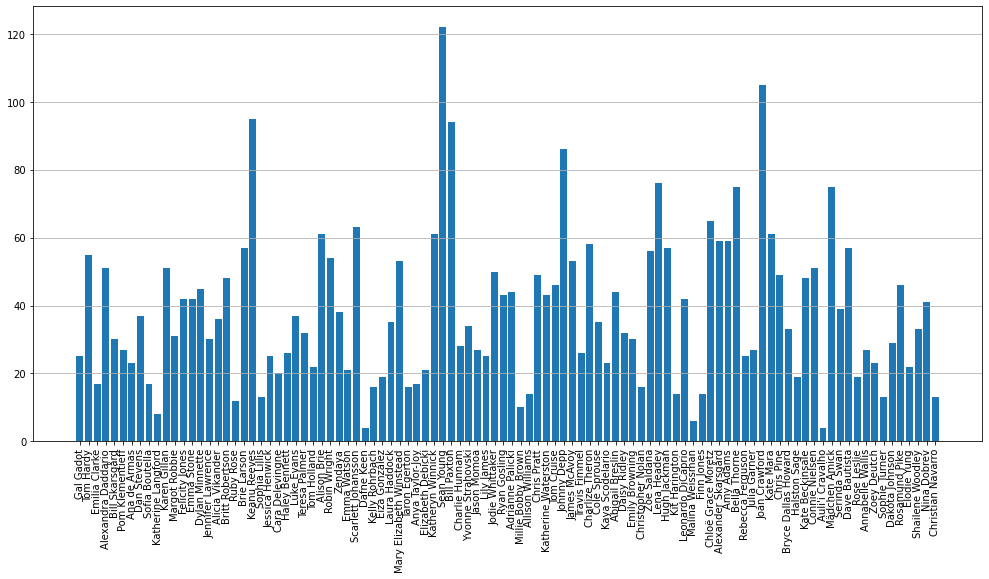

In [123]:
# your code here
plt.figure(figsize=(15,8))
plt.bar(df_staff.name,df_staff.credits)
plt.grid(axis='y')
plt.xticks(rotation='vertical')
plt.xlim()
plt.show()

<HR>

Your answer here

<HR>

In [ ]:
from IPython.core.display import HTML
def css_styling(): styles = open("styles/cs109.css", "r").read(); return HTML(styles)
css_styling()